In [1]:
from keras.datasets import mnist

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
train_images = xtrain.reshape((60000, 28, 28, 1))
train_images= xtrain.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = xtest.reshape((10000, 28, 28, 1))
test_images= xtest.astype('float32') / 255

train_labels = to_categorical(ytrain)
test_labels = to_categorical(ytest)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [5]:
import matplotlib.pyplot as plt

In [13]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [7]:
from keras import models, layers
import tensorflow as tf

In [8]:
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
model1 = models.Sequential()
model1.add(input_layer)
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
history1 = model1.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 38s 24ms/step - loss: 0.1929 - accuracy: 0.9384 - val_loss: 0.0990 - val_accuracy: 0.9687
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 3/5
782/782 [==============================] - 19s 24ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0455 - val_accuracy: 0.9878
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0371 - val_accuracy: 0.9896
Epoch 5/5
782/782 [==============================] - 19s 24ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9915


In [11]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.0320 - accuracy: 0.9898
Accuracy: 0.989799976348877
Loss:  0.03195559233427048


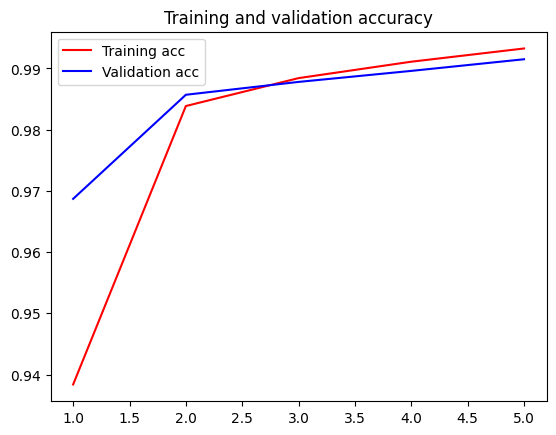

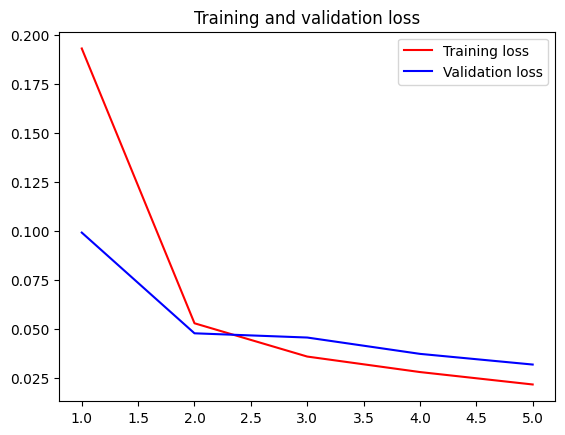

In [14]:
plot_accuracy_and_loss(history1)

## model 2 - cnn

In [15]:
model2 = models.Sequential()
model2.add(input_layer)
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [17]:
history2 = model2.fit(train_images, train_labels,
                      epochs=5,
                      batch_size=64,
                      validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 18s 22ms/step - loss: 0.1875 - accuracy: 0.9423 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 2/5
782/782 [==============================] - 17s 21ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0430 - val_accuracy: 0.9880
Epoch 3/5
782/782 [==============================] - 17s 21ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0549 - val_accuracy: 0.9855
Epoch 4/5
782/782 [==============================] - 17s 21ms/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0400 - val_accuracy: 0.9898
Epoch 5/5
782/782 [==============================] - 17s 21ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0385 - val_accuracy: 0.9906


In [18]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0257 - accuracy: 0.9910
Accuracy: 0.9909999966621399
Loss:  0.025728220120072365


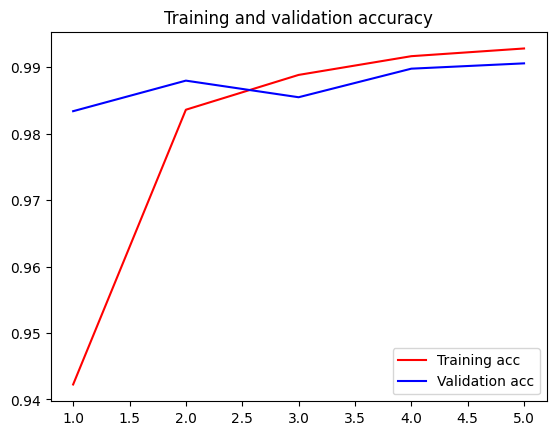

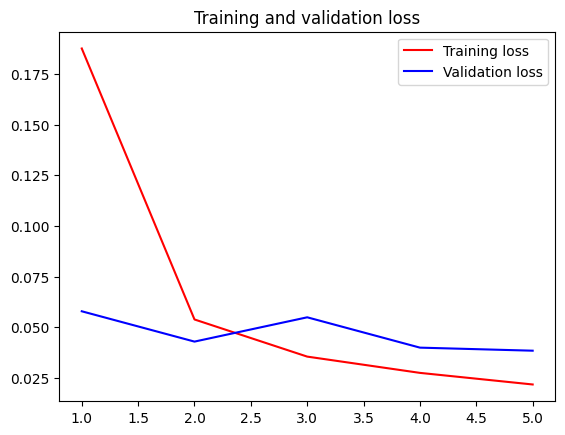

In [19]:
plot_accuracy_and_loss(history2)

## model 3 - cnn

In [35]:
model3 = models.Sequential([
  layers.Input(shape=(28, 28, 1)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 1, 1, 64)        

In [37]:
history3 = model3.fit(train_images, train_labels,
                      epochs=5,
                      batch_size=64,
                      validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 12s 14ms/step - loss: 0.4443 - accuracy: 0.8608 - val_loss: 0.1884 - val_accuracy: 0.9397
Epoch 2/5
782/782 [==============================] - 11s 14ms/step - loss: 0.1601 - accuracy: 0.9509 - val_loss: 0.0811 - val_accuracy: 0.9751
Epoch 3/5
782/782 [==============================] - 11s 14ms/step - loss: 0.1136 - accuracy: 0.9651 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 4/5
782/782 [==============================] - 11s 14ms/step - loss: 0.0915 - accuracy: 0.9719 - val_loss: 0.0691 - val_accuracy: 0.9801
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.0588 - val_accuracy: 0.9825


In [38]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0257 - accuracy: 0.9910
Accuracy: 0.9909999966621399
Loss:  0.025728220120072365


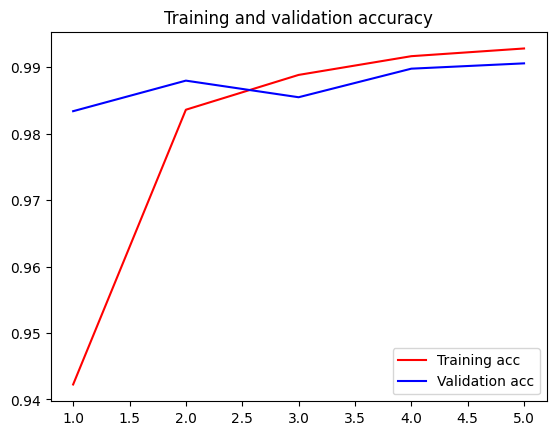

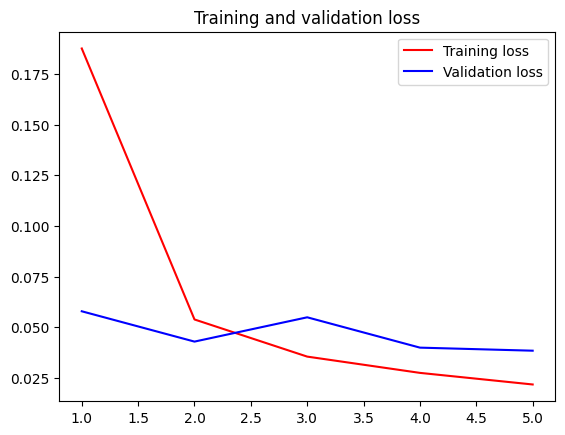

In [39]:
plot_accuracy_and_loss(history2)

## Ensemble - 1

In [44]:
import keras

In [48]:
model1.trainable =True
models = [model1, model1]
y = [model.output[0] for model in models]
output = tf.keras.layers.Average()(y)
model = keras.Model(input_layer,sa output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 11, 11, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                            

In [49]:
model.compile(optimizer='Adam',
             loss='mse',
             metrics='binary_accuracy')

In [50]:
history = model.fit(train_images, train_labels,
                      epochs=5,
                      batch_size=64,
                      validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 25s 24ms/step - loss: 0.1014 - binary_accuracy: 0.8872 - val_loss: 0.0900 - val_binary_accuracy: 0.9000
Epoch 2/5
782/782 [==============================] - 20s 25ms/step - loss: 0.0900 - binary_accuracy: 0.9000 - val_loss: 0.0900 - val_binary_accuracy: 0.9000
Epoch 3/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0900 - binary_accuracy: 0.9000 - val_loss: 0.0900 - val_binary_accuracy: 0.9000
Epoch 4/5
782/782 [==============================] - 15s 20ms/step - loss: 0.0900 - binary_accuracy: 0.9000 - val_loss: 0.0900 - val_binary_accuracy: 0.9000
Epoch 5/5
782/782 [==============================] - 16s 20ms/step - loss: 0.0900 - binary_accuracy: 0.9000 - val_loss: 0.0900 - val_binary_accuracy: 0.9000


## ensemble 2

In [52]:
model1.trainable = False
model2.trainable = False
models = [model1, model2]
y = [model(input_layer) for model in models]
output = tf.keras.layers.average(y)
model = keras.Model(input_layer, output)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 10)           93322       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 10)           121930      ['input_1[0][0]']                
                                                                                                  
 average_8 (Average)            (None, 10)           0           ['sequential[1][0]',             
                                                                  'sequential_1[1][0]']     

In [53]:
model.compile(optimizer='Adam',
             loss='mse',
             metrics='binary_accuracy')

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0013 - binary_accuracy: 0.9985
Accuracy: 0.9984898567199707
Loss:  0.001318833907134831


## Ensemble 3

In [55]:
model1.trainable = False
model2.trainable = False
model3.trainable = False
models = [model1, model2, model3]
y = [model(input_layer) for model in models]
output = tf.keras.layers.average(y)
model = keras.Model(input_layer, output)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 10)           93322       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 10)           121930      ['input_1[0][0]']                
                                                                                                  
 sequential_6 (Sequential)      (None, 10)           32906       ['input_1[0][0]']                
                                                                                            

In [58]:
model.compile(optimizer='Adam',
             loss='mse',
             metrics='binary_accuracy')

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0115 - binary_accuracy: 0.9973
Accuracy: 0.9972700476646423
Loss:  0.01150111760944128


## ensemble-4

In [60]:
model1.trainable = True
model2.trainable = True
model3.trainable = True
models = [model1, model2, model3]
y = [model(input_layer) for model in models]
output = tf.keras.layers.average(y)
model = keras.Model(input_layer, output)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 10)           93322       ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 10)           121930      ['input_1[0][0]']                
                                                                                                  
 sequential_6 (Sequential)      (None, 10)           32906       ['input_1[0][0]']                
                                                                                            

In [62]:
model.compile(optimizer='Adam',
             loss='mse',
             metrics='binary_accuracy')

In [63]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0115 - binary_accuracy: 0.9973
Accuracy: 0.9972700476646423
Loss:  0.01150111760944128


In [64]:
history = model.fit(train_images, train_labels,
                      epochs=5,
                      batch_size=64,
                      validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 37s 46ms/step - loss: 0.0013 - binary_accuracy: 0.9990 - val_loss: 0.0015 - val_binary_accuracy: 0.9983
Epoch 2/5
782/782 [==============================] - 36s 46ms/step - loss: 0.0011 - binary_accuracy: 0.9990 - val_loss: 0.0017 - val_binary_accuracy: 0.9983
Epoch 3/5
782/782 [==============================] - 36s 46ms/step - loss: 8.5907e-04 - binary_accuracy: 0.9993 - val_loss: 0.0016 - val_binary_accuracy: 0.9982
Epoch 4/5
782/782 [==============================] - 36s 46ms/step - loss: 7.3749e-04 - binary_accuracy: 0.9994 - val_loss: 0.0015 - val_binary_accuracy: 0.9983
Epoch 5/5
782/782 [==============================] - 36s 46ms/step - loss: 7.0553e-04 - binary_accuracy: 0.9995 - val_loss: 0.0014 - val_binary_accuracy: 0.9982


In [65]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0013 - binary_accuracy: 0.9985
Accuracy: 0.9984898567199707
Loss:  0.001318833907134831
